In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('C:/Users/Michael Roy/Documents\Springboard/pycon-pandas-tutorial-master/style-table.css').read() + open('C:/Users/Michael Roy/Documents\Springboard/pycon-pandas-tutorial-master/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('C:/Users/Michael Roy/Documents\Springboard/pycon-pandas-tutorial-master/data/titles.csv', index_col=None)
titles.head()

,title,year
0,Al-suq al-Soda',1945
1,The Invisible Player,2015
2,The Axe Murders of Villisca,2016
3,The Crow Scarer,2014
4,Ves mir v glazakh tvoikh,1979


In [4]:
cast = pd.DataFrame.from_csv('C:/Users/Michael Roy/Documents/Springboard/pycon-pandas-tutorial-master/data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [12]:
# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?
c = cast
c = c[(c.character == "Superman") | (c.character == "Batman")]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
d = c[c.Superman > c.Batman]
print('Superman years:')
print(len(d))

Superman years:
11


In [13]:
# How many years have been "Batman years", with more Batman characters than Superman characters?
c = cast
c = c[(c.character == "Superman") | (c.character == "Batman")]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
d = c[c.Batman > c.Superman]
print('Batman years:')
print(len(d))

Batman years:
26


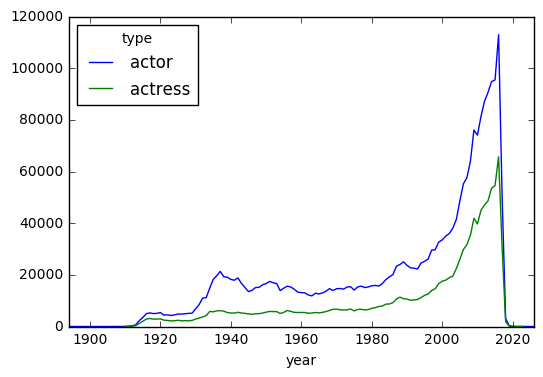

In [20]:
# Plot the number of actor roles each year and the number of actress roles each year over the history of film.
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

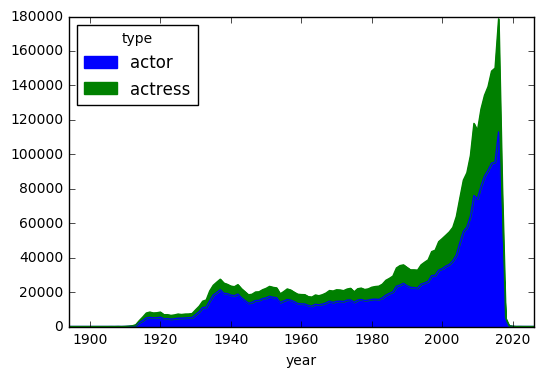

In [21]:
# Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')

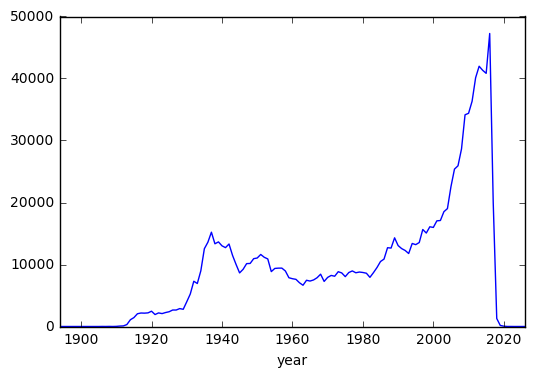

In [29]:
# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c = c.fillna(0)
c = c.actor - c.actress
c.plot()

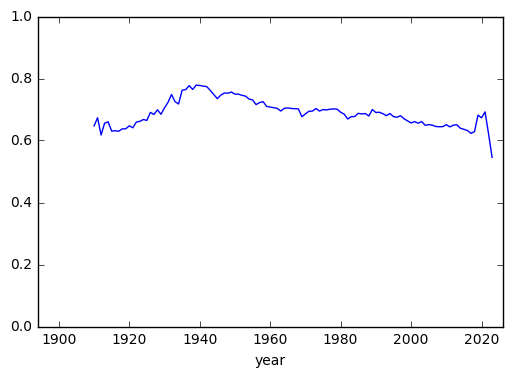

In [36]:
# Plot the fraction of roles that have been 'actor' roles each year in the history of film.
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
#c = c.fillna(0)
c = (c.actor / (c.actor + c.actress))
c.plot(ylim=[0,1])

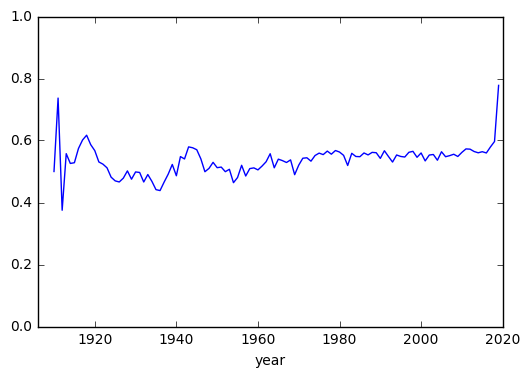

In [39]:
# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c = (c.actor / (c.actor + c.actress))
c.plot(ylim=[0,1])

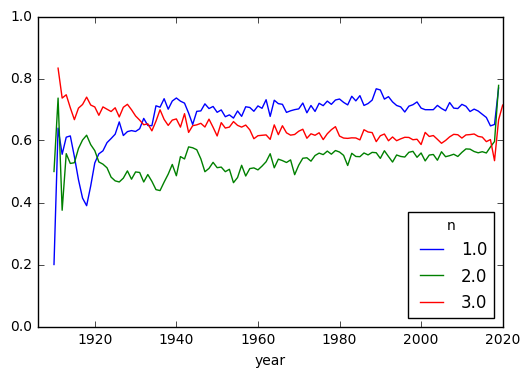

In [48]:
# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = (c.actor / (c.actor + c.actress))
r = r.unstack('n')
r.plot(ylim=[0,1])